# Adding multiple chips to wafer

In [437]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [438]:
import sys
main_folder_path = r"C:\Users\eeshg\Documents\multimode_sims\Design\fab\LMM5_Yuvi"
sys.path.append(main_folder_path)

In [439]:

import os
import phidl.geometry as pg
from phidl import Device, quickplot as qp
import numpy as np
from utilities import *

# Create a blank wafer layout
wafer_name = "Yuvi_couplers_juncs"
wafer = Device(wafer_name)

# Add wafer outline (2-inch wafer = 5.08 cm = 50,800 um diameter)
wafer_radius = 45000 #- 2000   # um 2mm edge bead removal
wafer << pg.circle(radius=wafer_radius, layer=0)


DeviceReference (parent Device "circle", ports [], origin (0, 0), rotation 0, x_reflection False)

In [440]:
# show_dict = {'qubits': True,
#              'coupler_full': True, 
#              'resonators': False }
show_layers_dict = {'optical': False,
               'ebeam': True,}

# Divide  chip into quadrants 

In [441]:
def create_boxes(num_rows, num_cols, box_size, spacing, wafer, x_offset=0, y_offset=0):
    # Create an array of boxes
    for row in range(num_rows):
        for col in range(num_cols):
            box_device = pg.rectangle(size=box_size, layer=5)  # Create the box
            # Calculate the position with the provided offsets
            box_x_offset = x_offset + col * (box_size[0] + spacing)
            box_y_offset = y_offset + row * (box_size[1] + spacing)
            box_device.move((box_x_offset - (num_cols * box_size[0] + (num_cols - 1) * spacing) / 2,
                              box_y_offset - (num_rows * box_size[1] + (num_rows - 1) * spacing) / 2))  # Center the array around the provided offsets
            wafer << box_device  # Add box to the wafer layout

In [442]:
# # finally just some lines for cleaving wafer to quadrants
# create_boxes(num_rows =1, num_cols =1, box_size = (wafer_radius*2, 100), spacing = 0,
#                          wafer = wafer, x_offset = 0, y_offset = 0)
# # vertical
# create_boxes(num_rows =1, num_cols =1, box_size = (100, wafer_radius*2), spacing = 0,
#                          wafer = wafer, x_offset = 0, y_offset = 0)
# # ebeam marker 
# create_boxes(num_rows =1, num_cols =1, box_size = (80,80), spacing = 0,
#                          wafer = wafer, x_offset = -28550, y_offset = 25520 )
# # above is left corner , add 500 um spaced around it 
# for idx in range (1,10): 
#     create_boxes(num_rows =1, num_cols =1, box_size = (80,80), spacing = 100,
#                          wafer = wafer, x_offset = -28550 + idx*500, y_offset = 25520 )
#     create_boxes(num_rows =1, num_cols =1, box_size = (80,80), spacing = 100,
#                          wafer = wafer, x_offset = -28550 , y_offset = 25520 - idx*500 )

# qp(wafer)


# Multimode Couplers

In [443]:
#Make the following code into a function : add bounding boxes and return negative mas 
# it should take arguments wafer, coupler_chip_obj, coupler_width, idx
# and return the wafer with the negative mask added
def add_coupler_bbox_and_negative_mask(wafer, coupler_chip_obj, coupler_width, idx, xpos_offset,
                                       ypos_offset):
    coupler_length = 48500
    test_structure_length = 4500 +2000

    xpos = xpos_offset + (idx * coupler_width)
    ypos = ypos_offset

    coupler_bbox = pg.rectangle(size=(coupler_width, coupler_length), layer=13)
    wafer << coupler_bbox.move((xpos - 100, ypos - 100))

    test_structure_bbox = pg.rectangle(size=(coupler_width, test_structure_length), layer=13)
    wafer << test_structure_bbox.move((xpos - 100, ypos + coupler_length - 100))

    coupler_chip_bbox = pg.rectangle(size=(coupler_width, coupler_length + test_structure_length), layer=14)
    coupler_chip_bbox.move((-100, -100))

    coupler_negative = pg.boolean(A=coupler_chip_bbox, B=coupler_chip_obj, operation='xor', layer=5)
    wafer << coupler_negative.move((xpos, ypos))

    return wafer

In [444]:
coupler_size = (5650, 55000)
num_chips = 13
spacing = 100

In [445]:
coupler_files

['C:\\Users\\eeshg\\Documents\\multimode_sims\\Design\\fab\\LMM5_Yuvi\\designs_dxf\\YUVI_COUPLER_JUNCS-A.dxf',
 'C:\\Users\\eeshg\\Documents\\multimode_sims\\Design\\fab\\LMM5_Yuvi\\designs_dxf\\YUVI_COUPLER_JUNCS-B.dxf',
 'C:\\Users\\eeshg\\Documents\\multimode_sims\\Design\\fab\\LMM5_Yuvi\\designs_dxf\\YUVI_COUPLER_JUNCS-C.dxf',
 'C:\\Users\\eeshg\\Documents\\multimode_sims\\Design\\fab\\LMM5_Yuvi\\designs_dxf\\YUVI_COUPLER_JUNCS-D.dxf',
 'C:\\Users\\eeshg\\Documents\\multimode_sims\\Design\\fab\\LMM5_Yuvi\\designs_dxf\\YUVI_COUPLER_JUNCS-E.dxf',
 'C:\\Users\\eeshg\\Documents\\multimode_sims\\Design\\fab\\LMM5_Yuvi\\designs_dxf\\YUVI_COUPLER_JUNCS-F.dxf',
 'C:\\Users\\eeshg\\Documents\\multimode_sims\\Design\\fab\\LMM5_Yuvi\\designs_dxf\\YUVI_COUPLER_JUNCS-G.dxf',
 'C:\\Users\\eeshg\\Documents\\multimode_sims\\Design\\fab\\LMM5_Yuvi\\designs_dxf\\YUVI_COUPLER_JUNCS-H.dxf',
 'C:\\Users\\eeshg\\Documents\\multimode_sims\\Design\\fab\\LMM5_Yuvi\\designs_dxf\\YUVI_COUPLER_JUNCS-I.dxf',
 

Importing C:\Users\eeshg\Documents\multimode_sims\Design\fab\LMM5_Yuvi\designs_dxf\YUVI_COUPLER_JUNCS-A.gds
Importing C:\Users\eeshg\Documents\multimode_sims\Design\fab\LMM5_Yuvi\designs_dxf\YUVI_COUPLER_JUNCS-A.gds
Importing C:\Users\eeshg\Documents\multimode_sims\Design\fab\LMM5_Yuvi\designs_dxf\YUVI_COUPLER_JUNCS-A.gds
Importing C:\Users\eeshg\Documents\multimode_sims\Design\fab\LMM5_Yuvi\designs_dxf\YUVI_COUPLER_JUNCS-B.gds
Importing C:\Users\eeshg\Documents\multimode_sims\Design\fab\LMM5_Yuvi\designs_dxf\YUVI_COUPLER_JUNCS-B.gds
Importing C:\Users\eeshg\Documents\multimode_sims\Design\fab\LMM5_Yuvi\designs_dxf\YUVI_COUPLER_JUNCS-B.gds
Importing C:\Users\eeshg\Documents\multimode_sims\Design\fab\LMM5_Yuvi\designs_dxf\YUVI_COUPLER_JUNCS-C.gds
Importing C:\Users\eeshg\Documents\multimode_sims\Design\fab\LMM5_Yuvi\designs_dxf\YUVI_COUPLER_JUNCS-C.gds
Importing C:\Users\eeshg\Documents\multimode_sims\Design\fab\LMM5_Yuvi\designs_dxf\YUVI_COUPLER_JUNCS-C.gds
Importing C:\Users\eeshg\Doc

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Importing C:\Users\eeshg\Documents\multimode_sims\Design\fab\LMM5_Yuvi\designs_dxf\YUVI_COUPLER_JUNCS-I.gds
Importing C:\Users\eeshg\Documents\multimode_sims\Design\fab\LMM5_Yuvi\designs_dxf\YUVI_COUPLER_JUNCS-I.gds
Importing C:\Users\eeshg\Documents\multimode_sims\Design\fab\LMM5_Yuvi\designs_dxf\YUVI_COUPLER_JUNCS-J.gds
Importing C:\Users\eeshg\Documents\multimode_sims\Design\fab\LMM5_Yuvi\designs_dxf\YUVI_COUPLER_JUNCS-J.gds
Importing C:\Users\eeshg\Documents\multimode_sims\Design\fab\LMM5_Yuvi\designs_dxf\YUVI_COUPLER_JUNCS-J.gds
Importing C:\Users\eeshg\Documents\multimode_sims\Design\fab\LMM5_Yuvi\designs_dxf\YUVI_COUPLER_JUNCS-K.gds
Importing C:\Users\eeshg\Documents\multimode_sims\Design\fab\LMM5_Yuvi\designs_dxf\YUVI_COUPLER_JUNCS-K.gds
Importing C:\Users\eeshg\Documents\multimode_sims\Design\fab\LMM5_Yuvi\designs_dxf\YUVI_COUPLER_JUNCS-K.gds
Importing C:\Users\eeshg\Documents\multimode_sims\Design\fab\LMM5_Yuvi\designs_dxf\YUVI_COUPLER_JUNCS-L.gds
Importing C:\Users\eeshg\Doc

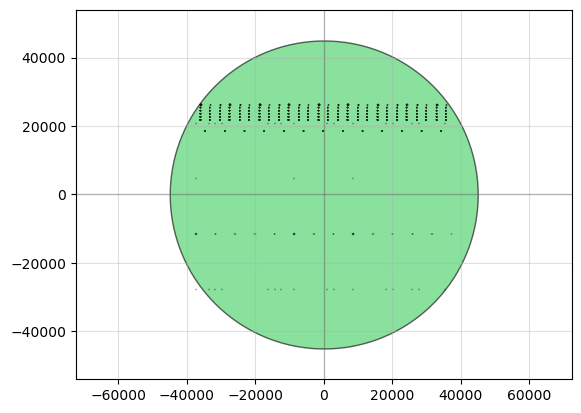

In [446]:
with open("multimode/chip_names_coupler.txt", "r") as f:
    chip_names_read = [line.strip() for line in f.readlines()]
coupler_files = chip_names_read[:num_chips]

coupler_x_pitch = coupler_size[0] + spacing
coup_xoffset = -1*(coupler_x_pitch*num_chips/2) # bottom left corner
coup_yoffset = -1* (coupler_size[1]/2)#*num_chips/2)
# Import the GDS structure

if show_layers_dict['optical']: 
    for idx, file in enumerate(coupler_files):
        wafer, coupler_chip_obj = add_dxf_chip_to_wafer(wafer, file, "", coupler_width, idx, x_offset=coup_xoffset +idx*spacing, y_offset=coup_yoffset,
                                                        add_bool = False)

        wafer = add_coupler_bbox_and_negative_mask(wafer, coupler_chip_obj, coupler_width, idx, xpos_offset=coup_xoffset +idx*spacing, ypos_offset=coup_yoffset)
    offset = 150
    dicing_lanes = add_dicing_lanes(coup_xoffset - offset, coup_yoffset -offset, num_chips, spacing, coupler_size, num_rows = 1)
    wafer << dicing_lanes

# ebeam 
if show_layers_dict['ebeam']: 
    layers_in = [2,3, 4]  # undercut , fulcut
    layers_out = [2,3,4] # 4 is ebeam dicing lane 
    for idx, file in enumerate(coupler_files):
        for layer_in, layer_out in zip (layers_in, layers_out):
            wafer, coupler_chip_obj = add_dxf_chip_to_wafer(wafer, file, "", coupler_width, idx, x_offset=coup_xoffset +idx*spacing, y_offset=coup_yoffset,
                                                            add_bool = True, layer_in=layer_in, layer_out=layer_out)
        #     add_coherence_qubits(
        #     wafer_device=wafer, 
        #     x_offset=coup_xoffset +idx*spacing,
        #     y_offset=coup_yoffset,
        #     qubit_gds=file,
        #     bbox_size=coupler_size,
        #     # Pass along other necessary parameters from your original code
        #     num_qubits=1, # This function places one chip at a time
        #     bbox=False, 
        #     layer_in=layer_in, 
        #     layer_out=layer_out
        # )
qp(wafer)

In [447]:
coupler_files[0]

'C:\\Users\\eeshg\\Documents\\multimode_sims\\Design\\fab\\LMM5_Yuvi\\designs_dxf\\YUVI_COUPLER_JUNCS-A.dxf'

In [448]:
wafer.write_gds(wafer_name + ".gds")

'Yuvi_couplers_juncs.gds'

# Resonators , coherence qubits , hall bars

In [449]:
folder_lab_designs = "lab_designs/"
coh_files = [
    # folder_lab_designs + "center_feedline_resonator_final_vortex_11182025_single_layer.gds",
    # folder_lab_designs + "SiQbv2_wide_JJ_EEEEEEESH_jc0.3_offset0.0.gds", # buffer 
    folder_lab_designs + "20251029_Mihir_HallBars_Metals-Superconductors_v5_layer5.gds",
    folder_lab_designs + "center_feedline_resonator_final_vortex_11182025_single_layer.gds", 
    folder_lab_designs + "SiQbv2_wide_JJ_EEEEEEESH_jc0.3_offset0.0.gds", # 
    folder_lab_designs + "SiQbv2_wide_JJ_EEEEEEESH_jc0.2_offset0.0.gds", #  
    folder_lab_designs + "SiQbv2_wide_JJ_EEEEEEESH_jc0.3_offset0.0.gds", # 
    folder_lab_designs + "center_feedline_resonator_final_vortex_11182025_single_layer.gds", 
    folder_lab_designs + "20251029_Mihir_HallBars_Metals-Superconductors_v5_layer5.gds"
    # folder_lab_designs + "center_feedline_resonator_final_vortex_11182025_single_layer.gds"
]
if show_layers_dict['ebeam']: 
    # remove any file that does not have SiQbv2 in its name; set it to None
    coh_files = [file if "SiQbv2" in file else None for file in coh_files]

In [450]:
# x and y offset are lower left corner of first row qubit
x_offset = -24000
y_offset = 28000

# typically chip dxfs have origin at center of chip. for these ones, origin is at lower left corner
if show_layers_dict['optical']:
  place_chip_row(wafer = wafer, 
                gds_files = coh_files,
                start_position = (x_offset, y_offset),
                chip_size = (7000, 7000),
                spacing = 100,
                layers = (5, 5),
                  origin_at_chip_botleft_corner = False
                ) 
elif show_layers_dict['ebeam']:
  layers_in = [60,20]  # undercut , fulcut
  layers_out = [2,3]
  for layer_in, layer_out in zip (layers_in, layers_out):
      place_chip_row(wafer = wafer, 
                    gds_files = coh_files,
                    start_position = (x_offset, y_offset),
                    chip_size = (7000, 7000),
                    spacing = 100,
                    layers = (layer_in, layer_out),
                      origin_at_chip_botleft_corner = False,
                    bbox = False
                    )
  # ebeam layer
  # undercut 
  # full cut 

(60, 2)
Placing a row of 7 chips...
Skipping chip 1/7 due to empty filename.
Skipping chip 2/7 due to empty filename.
Placing chip 3/7 at x=-9800, y=28000 using file: lab_designs/SiQbv2_wide_JJ_EEEEEEESH_jc0.3_offset0.0.gds
Qubit location before adjustment: (np.float64(-6300.0), np.float64(31500.0))
BBox size: (7000, 7000)
Placing chip 4/7 at x=-2700, y=28000 using file: lab_designs/SiQbv2_wide_JJ_EEEEEEESH_jc0.2_offset0.0.gds
Qubit location before adjustment: (np.float64(800.0), np.float64(31500.0))
BBox size: (7000, 7000)
Placing chip 5/7 at x=4400, y=28000 using file: lab_designs/SiQbv2_wide_JJ_EEEEEEESH_jc0.3_offset0.0.gds
Qubit location before adjustment: (np.float64(7900.0), np.float64(31500.0))
BBox size: (7000, 7000)
Skipping chip 6/7 due to empty filename.
Skipping chip 7/7 due to empty filename.
(20, 3)
Placing a row of 7 chips...
Skipping chip 1/7 due to empty filename.
Skipping chip 2/7 due to empty filename.
Placing chip 3/7 at x=-9800, y=28000 using file: lab_designs/SiQb

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


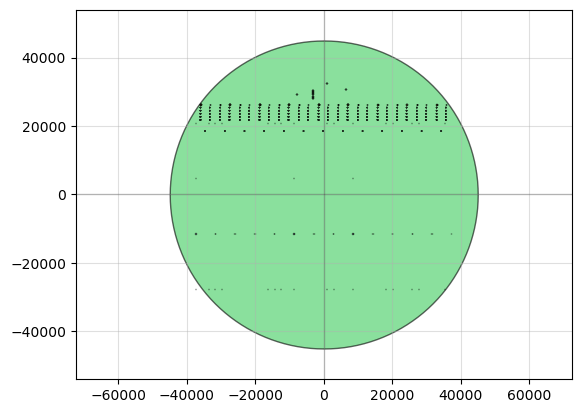

In [451]:
qp(wafer)

In [452]:
wafer.write_gds(wafer_name)

'Yuvi_couplers_juncs.gds'

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


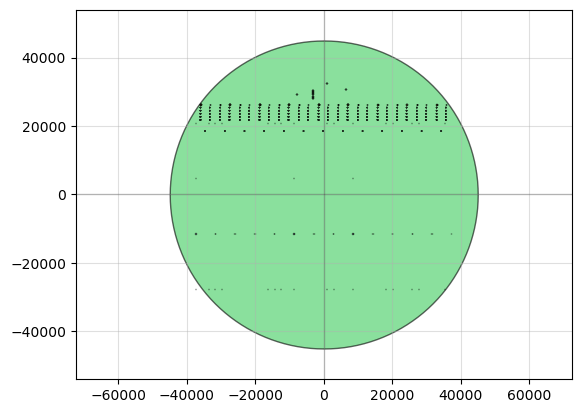

In [453]:
# x and y offset are lower left corner of first row qubit
x_offset = -24000
y_offset = -28000 - 7200

# typically chip dxfs have origin at center of chip. for these ones, origin is at lower left corner
if show_layers_dict['optical']:
  place_chip_row(wafer = wafer, 
                gds_files = coh_files,
                start_position = (x_offset, y_offset),
                chip_size = (7000, 7000),
                spacing = 100,
                layers = (5, 5),
                  origin_at_chip_botleft_corner = False
                ) 
else: 
  pass
  # ebeam layer
  # undercut 
  # full cut 
qp(wafer)

In [454]:
wafer.write_gds(wafer_name)

'Yuvi_couplers_juncs.gds'

# Multimode Chip Quadrant

In [455]:
juncs_triad_upper_half_x_offset = 0 
juncs_triad_lower_half_y_offset = 0

## Multimode Qubit

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


xpos_offset for qubit chips: -25870
ypos_offset for qubit chips: 1000
Importing designs_dxf/YUVIQUBITS_OPTICAL-A.gds
Layers in imported DXF: {np.int64(0)}
returning dcing layer too
Importing designs_dxf/YUVIQUBITS_OPTICAL-B.gds
Layers in imported DXF: {np.int64(0)}
returning dcing layer too
Importing designs_dxf/YUVIQUBITS_OPTICAL-C.gds
Layers in imported DXF: {np.int64(0)}
returning dcing layer too
Importing designs_dxf/YUVIQUBITS_OPTICAL-D.gds
Layers in imported DXF: {np.int64(0)}
returning dcing layer too
Importing designs_dxf/YUVIQUBITS_OPTICAL-E.gds
Layers in imported DXF: {np.int64(0)}
returning dcing layer too
Importing designs_dxf/YUVIQUBITS_OPTICAL-F.gds
Layers in imported DXF: {np.int64(0)}
returning dcing layer too
Importing designs_dxf/YUVIQUBITS_OPTICAL-G.gds
Layers in imported DXF: {np.int64(0)}
returning dcing layer too
Importing designs_dxf/YUVIQUBITS_OPTICAL-H.gds
Layers in imported DXF: {np.int64(0)}
returning dcing layer too
Importing designs_dxf/YUVIQUBITS_OPTICAL-I

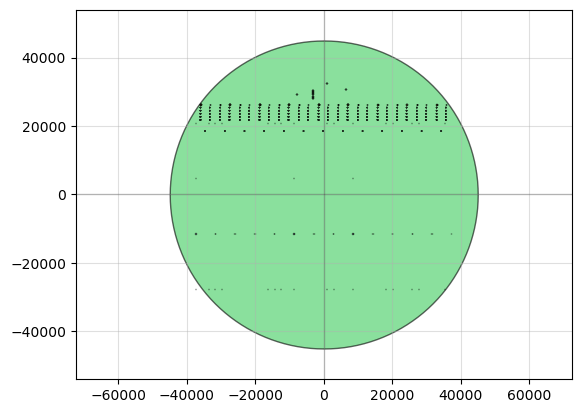

In [456]:

# Qubits 
# Define path to DXF file to import
def place_mm_qubits(x_offset, y_offset, wafer=wafer):
    
    qubit_chip_width = 2000 # um 
    qubit_chip_length = 28497.05  # um
    actual_chip_length_offset = 2250 # there is dead space on top of chip for some alignment..
    # path = r"C:\Users\eeshg\Documents\multimode_sims\Design\coupler"  # <-- UPDATE THIS
    path = 'designs_dxf/'
    with open("multimode/chip_names_qubit.txt", "r") as f:
        chip_names_read = [os.path.basename(line.strip()) for line in f.readlines()]
    upper_dxf_files = chip_names_read[:]
    # lower_dxf_files = chip_names_read[-1:]


    # x pos and y pos offsets corner of first qubit chip after rotation by 90 degrees)
    xpos_offset_final_mchips = x_offset
    ypos_offset_final_mchips = y_offset

    xpos_offset = -1* ypos_offset_final_mchips # this is the actual x offset after importing gds (before 90 deg rotation)
    ypos_offset = xpos_offset_final_mchips

    print("xpos_offset for qubit chips:", xpos_offset)
    print("ypos_offset for qubit chips:", ypos_offset)
    spacing = 100  # um spacing between chips

    # Import the GDS structure
    if show_layers_dict['optical']:
        if show_dict['qubits']: 
            for idx, file in enumerate(upper_dxf_files):
                wafer, qubit_obj = add_dxf_chip_to_wafer(wafer, file, path, qubit_chip_width, idx, x_offset=xpos_offset , y_offset=ypos_offset, add_bool=False)
                # qubit_obj.rotate(0)  # Rotate the qubit chip by 90 degrees
                wafer, qubit_negative, qubit_bbox = add_qubit_bbox_and_negative_mask(wafer, qubit_obj, qubit_chip_width, idx, xpos_offset=xpos_offset + idx*spacing, ypos_offset=ypos_offset)
                qubit_negative.rotate(-90)  # Rotate the qubit chip by 90 degrees
                qubit_bbox.rotate(-90)  # Rotate the bounding box by 90 degrees

            # Add dicing lanes
            xpos_offset = xpos_offset #- qubit_chip_width/2 - spacing/2
            ypos_offset = ypos_offset #- qubit_chip_width/2 - spacing/2
            print("xpos_offset for dicing lanes:", xpos_offset)
            print("ypos_offset for dicing lanes:", ypos_offset)
            num_cols = len(upper_dxf_files) 
            num_rows = 1
            box_size = (qubit_chip_width, qubit_chip_length - 2250 - 100) # just the chip not the extension
            num_chips = len(upper_dxf_files)
            print("num_chips:", num_chips)

            x_pos_offset_box = xpos_offset -spacing/2
            y_pos_offset_box = ypos_offset 
            dicing_lane_geometry = add_dicing_lanes(x_pos_offset_box, y_pos_offset_box, num_cols, spacing, box_size, num_rows)
            #rotate dicing lanes by 90 degrees
            dicing_lane_geometry.rotate(-90)
            wafer << dicing_lane_geometry

            # wafer = pg.union(wafer, by_layer=True, layer=5) # resolves any dicing lane overlaps with itself

    elif show_layers_dict['ebeam']:
        for idx, file in enumerate(upper_dxf_files):
            wafer, qubit_gap, qubit_pin, qubit_dicing = add_dxf_chip_to_wafer_junc(wafer, file, path, qubit_chip_width, idx, x_offset=xpos_offset, y_offset=ypos_offset, add_bool=True)
            qubit_gap.rotate(-90)  # Rotate the qubit chip by 90 degrees
            qubit_pin.rotate(-90)  # Rotate the bounding box by 90 degrees
            qubit_dicing.rotate(-90)  # Rotate the bounding box by 90 degrees


# Quick preview (optional)
place_mm_qubits(x_offset = 1000,
                y_offset = 25870)

qp(wafer)



In [457]:
# Save the wafer layout to a GDS file
wafer.write_gds("Yuvi_wafer_optical.gds")

'Yuvi_wafer_optical.gds'

## SMPDs

In [458]:
folder_smpd_designs = "SMPD_design/"
folder_lab_designs = "lab_designs/"
smpd_files = [
    folder_smpd_designs + "v1p8pb100_Eeshfab_smpd_fixed.gds",
    folder_smpd_designs + "v3p2b100_Eeshfab_smpd_new_fixed.gds",
    folder_smpd_designs + "v2p5b100_Eeshfab_smpd_fixed.gds",
    # folder_lab_designs + "SiQbv2_wide_JJ_EEEEEEESH_jc0.3_offset0.0.gds"
]
smpd_files2 = [folder_smpd_designs + "v1p8pb096_Eeshfab_smpd_fixed.gds",
    folder_smpd_designs + "v3p2b100_Eeshfab_smpd_new_fixed.gds",
    folder_smpd_designs + "v2p5b096_Eeshfab_smpd_fixed.gds",]

smpd_files3 =  [folder_smpd_designs + "v2p5b104_Eeshfab_smpd_fixed.gds",
    folder_smpd_designs + "v3p2b100_Eeshfab_smpd_new_fixed.gds",
    folder_smpd_designs + "v1p8pb102_Eeshfab_smpd_fixed.gds"]

In [459]:
# fname = folder_lab_designs + "SiQbv2_wide_JJ_EEEEEEESH_jc0.3_offset0.0.gds"
# # device = import_gds_robust(fname, spacing=0)
# device = pg.import_gds(fname)

In [460]:
# x and y offset are lower left corner of first row qubit
x_offset =1000 
y_offset = 26800
# typically chip dxfs have origin at center of chip. for these ones, origin is at lower left corner
if show_layers_dict['optical']:
  place_chip_row(wafer = wafer, 
                gds_files = smpd_files,
                start_position = (x_offset, y_offset),
                chip_size = (7000, 7000),
                spacing = 100,
                layers = (5, 5),
                  origin_at_chip_botleft_corner = True
                ) 
else: 
  pass
  # ebeam layer
  # undercut 
  # full cut 


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


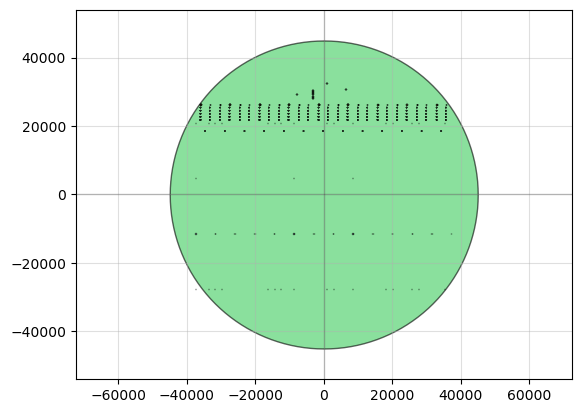

In [461]:
qp(wafer)

## Coherence qubit and resonator

In [462]:
folder_lab_designs = "lab_designs/"
coh_files = [
    folder_lab_designs + "center_feedline_resonator_final_vortex_11182025_single_layer.gds",
    # folder_lab_designs + "SiQbv2_wide_JJ_EEEEEEESH_jc0.3_offset0.0.gds", # buffer 
    folder_lab_designs + "SiQbv2_wide_JJ_EEEEEEESH_jc0.3_offset0.0.gds",
    # folder_lab_designs + "SiQbv2_wide_JJ_EEEEEEESH_jc0.3_offset0.0.gds", # buffer
    folder_lab_designs + "center_feedline_resonator_final_vortex_11182025_single_layer.gds"
]

In [463]:
# x and y offset are lower left corner of first row qubit
x_offset =30000
y_offset = 900 - 500

# typically chip dxfs have origin at center of chip. for these ones, origin is at lower left corner
if show_layers_dict['optical']:
  place_chip_column(wafer = wafer, 
                gds_files = coh_files,
                start_position = (x_offset, y_offset),
                chip_size = (7000, 7000),
                spacing = 100,
                layers = (5, 5),
                  origin_at_chip_botleft_corner = False
                ) 
else: 
  pass
  # ebeam layer
  # undercut 
  # full cut 

In [464]:
# # x and y offset are lower left corner of first row qubit
# x_offset =30000
# y_offset = 900

# print("x_offset for coherence qubits:", x_offset)
# print("y_offset for coherence qubits:", y_offset)
# num_copies = 1
# spacing = 100
# chip_size = (7000, 7000)
# if show_layers_dict['optical']:
#     if show_dict['qubits']: 
#         for idx, file in enumerate(coh_trans_files):
#             add_coherence_qubits(wafer, x_offset=x_offset,
#                                 y_offset=y_offset + idx*7000 + idx*spacing, 
#                                 num_qubits=num_copies, qubit_gds=file, bbox=True)
            
#         dicing_lane_geometry = add_dicing_lanes(x_offset - spacing,
#                             y_offset - spacing/2,
#                             num_rows=len(coh_trans_files),
#                             num_cols=1,
#                             box_size=chip_size,
#                             spacing=100)
#         wafer << dicing_lane_geometry
#         # print("Added dicing lanes for coherence qubits")
#         # print("num_cols:", len(coh_trans_files))
            
# elif show_layers_dict['ebeam']:
#     if show_dict['qubits']: 
#         for idx, file in enumerate(coh_trans_files):
#             add_coherence_qubits(wafer, x_offset=x_offset + idx*7000,
#                                 y_offset=y_offset, 
#                                 num_qubits=num_copies, qubit_gds=file, 
#                                 layer_in=np.int64(20), layer_out=np.int64(3))

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


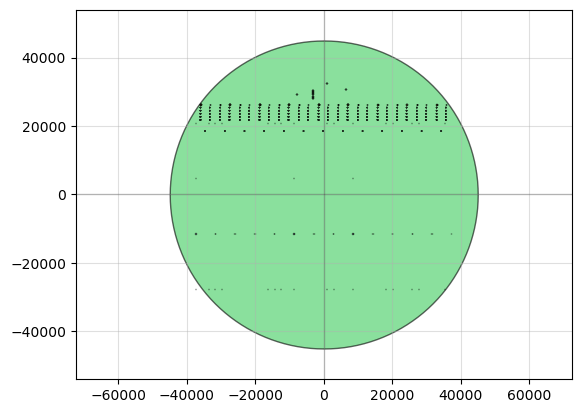

In [465]:
qp(wafer)

In [466]:
wafer.write_gds("Yuvi_wafer_optical.gds")

'Yuvi_wafer_optical.gds'

# The other 2 quadrants

MAKE SURE TO FIX BEFORE EBEAM ALIGNMENT!!!! MARKER POISTION SHOULD BE NICE NUMEBRS and the dicing border overlap issue

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


xpos_offset for qubit chips: 1000
ypos_offset for qubit chips: 1000
Importing designs_dxf/YUVIQUBITS_OPTICAL-A.gds
Layers in imported DXF: {np.int64(0)}
returning dcing layer too
Importing designs_dxf/YUVIQUBITS_OPTICAL-B.gds
Layers in imported DXF: {np.int64(0)}
returning dcing layer too
Importing designs_dxf/YUVIQUBITS_OPTICAL-C.gds
Layers in imported DXF: {np.int64(0)}
returning dcing layer too
Importing designs_dxf/YUVIQUBITS_OPTICAL-D.gds
Layers in imported DXF: {np.int64(0)}
returning dcing layer too
Importing designs_dxf/YUVIQUBITS_OPTICAL-E.gds
Layers in imported DXF: {np.int64(0)}
returning dcing layer too
Importing designs_dxf/YUVIQUBITS_OPTICAL-F.gds
Layers in imported DXF: {np.int64(0)}
returning dcing layer too
Importing designs_dxf/YUVIQUBITS_OPTICAL-G.gds
Layers in imported DXF: {np.int64(0)}
returning dcing layer too
Importing designs_dxf/YUVIQUBITS_OPTICAL-H.gds
Layers in imported DXF: {np.int64(0)}
returning dcing layer too
Importing designs_dxf/YUVIQUBITS_OPTICAL-I.g

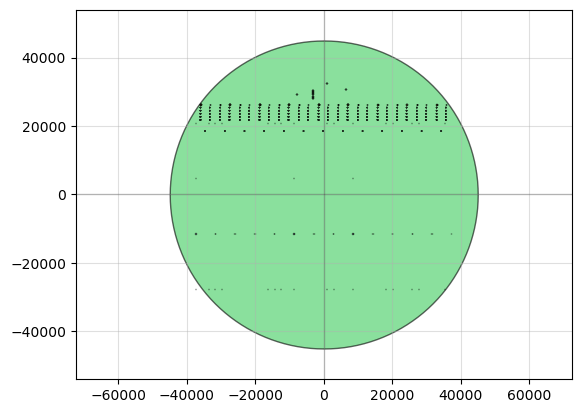

In [467]:
mm_offsets = [(1000, -1000),
               (-26800 - 2000 - 650, -1000),]
horizontal_chip_offsets = [(1000, -26800 - 7000),
                           (-26800 + 4000, -26800 - 7000),]
vertical_chip_offsets = [(30000, -600-7000*3),
                         (-30000 - 7000, -600 - 7000*3),]
horizontal_file_arrays = [smpd_files2,
                          smpd_files3,]

for idx in range(0, len(mm_offsets)):
  # ----------------------------- mm chips 
  
  # quadrant 2 
  place_mm_qubits(x_offset = mm_offsets[idx][0],
                  y_offset = mm_offsets[idx][1])

  # ------------------------- Horizontal chips

  # typically chip dxfs have origin at center of chip. for these ones, origin is at lower left corner
  if show_layers_dict['optical']:
    place_chip_row(wafer = wafer, 
                  gds_files = horizontal_file_arrays[idx],
                  start_position = (horizontal_chip_offsets[idx][0], horizontal_chip_offsets[idx][1]),
                  chip_size = (7000, 7000),
                  spacing = 100,
                  layers = (5, 5),
                    origin_at_chip_botleft_corner = True
                  ) 
  else: 
    pass
    # ebeam layer
    # undercut 
    # full cut 

  # ------------------------ Vertical chips 
  # x and y offset are lower left corner of first row qubit
  x_offset =30000
  y_offset = -600-7000*3

  # typically chip dxfs have origin at center of chip. for these ones, origin is at lower left corner
  if show_layers_dict['optical']:
    place_chip_column(wafer = wafer, 
                  gds_files = coh_files,
                  start_position = (vertical_chip_offsets[idx][0], vertical_chip_offsets[idx][1]),
                  chip_size = (7000, 7000),
                  spacing = 100,
                  layers = (5, 5),
                    origin_at_chip_botleft_corner = False
                  ) 
  else: 
    pass
    # ebeam layer
    # undercut 
    # full cut 

  # -------------------------- Horizontal chips 

qp(wafer)

In [468]:
wafer.write_gds("Yuvi_wafer_optical.gds")

'Yuvi_wafer_optical.gds'

# Kaveh's Quadrant

In [469]:
folder_designs = "kaveh_designs/"
kaveh_files = [
    folder_designs + "20251119_SMMS05U_RO_UShape_charge_line_flux_line_chip_01_Boolean_with_test_struct.gds",
    folder_designs + "20251119_SMMS05U_RO_UShape_charge_line_flux_line_chip_02_Boolean_with_test_struct.gds",
]

(200, 5)
Placing a row of 4 chips...
Placing chip 1/4 at x=-25800, y=1000 using file: kaveh_designs/20251119_SMMS05U_RO_UShape_charge_line_flux_line_chip_01_Boolean_with_test_struct.gds
Qubit location before adjustment: (np.float64(-22800.0), np.float64(5500.0))
BBox size: (6000, 9000)
Placing chip 2/4 at x=-19700, y=1000 using file: kaveh_designs/20251119_SMMS05U_RO_UShape_charge_line_flux_line_chip_01_Boolean_with_test_struct.gds
Qubit location before adjustment: (np.float64(-16700.0), np.float64(5500.0))
BBox size: (6000, 9000)
Placing chip 3/4 at x=-13600, y=1000 using file: kaveh_designs/20251119_SMMS05U_RO_UShape_charge_line_flux_line_chip_01_Boolean_with_test_struct.gds
Qubit location before adjustment: (np.float64(-10600.0), np.float64(5500.0))
BBox size: (6000, 9000)
Placing chip 4/4 at x=-7500, y=1000 using file: kaveh_designs/20251119_SMMS05U_RO_UShape_charge_line_flux_line_chip_01_Boolean_with_test_struct.gds
Qubit location before adjustment: (np.float64(-4500.0), np.float6

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


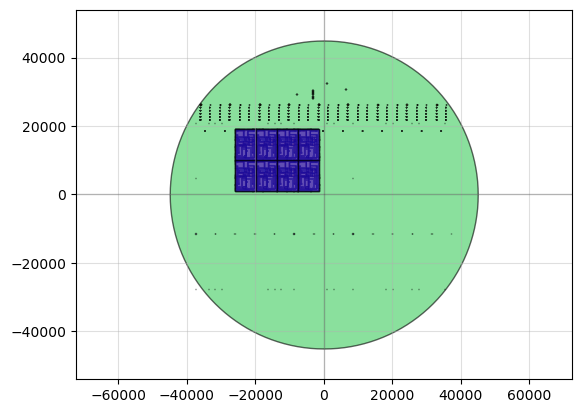

'Yuvi_wafer_optical.gds'

In [470]:
num_copies = 4
y_pitch = 9000 + 100
x_pitch = 6000 + 100

start_loc = (-38000 + 2 * x_pitch, 1000)
place_chip_row(
    wafer=wafer,
    gds_files=[kaveh_files[0] for _ in range(num_copies)],
    start_position=start_loc,
    chip_size=(6000, 9000),
    spacing=100,
    layers=(200, 5)
)
place_chip_row(
    wafer=wafer,
    gds_files=[kaveh_files[1] for _ in range(num_copies)],
    start_position=(start_loc[0], start_loc[1] + (9000 + 100)* 1) ,
    chip_size=(6000, 9000),
    spacing=100,
    layers=(200, 5)
)
qp(wafer)
wafer.write_gds("Yuvi_wafer_optical.gds")

(200, 5)
Placing a row of 3 chips...
Placing chip 1/3 at x=-19700, y=19200 using file: kaveh_designs/20251119_SMMS05U_RO_UShape_charge_line_flux_line_chip_02_Boolean_with_test_struct.gds
Qubit location before adjustment: (np.float64(-16700.0), np.float64(23700.0))
BBox size: (6000, 9000)
Placing chip 2/3 at x=-13600, y=19200 using file: kaveh_designs/20251119_SMMS05U_RO_UShape_charge_line_flux_line_chip_02_Boolean_with_test_struct.gds
Qubit location before adjustment: (np.float64(-10600.0), np.float64(23700.0))
BBox size: (6000, 9000)
Placing chip 3/3 at x=-7500, y=19200 using file: kaveh_designs/20251119_SMMS05U_RO_UShape_charge_line_flux_line_chip_02_Boolean_with_test_struct.gds
Qubit location before adjustment: (np.float64(-4500.0), np.float64(23700.0))
BBox size: (6000, 9000)
(200, 5)
Placing a row of 3 chips...
Placing chip 1/3 at x=-19700, y=28300 using file: kaveh_designs/20251119_SMMS05U_RO_UShape_charge_line_flux_line_chip_01_Boolean_with_test_struct.gds
Qubit location before 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


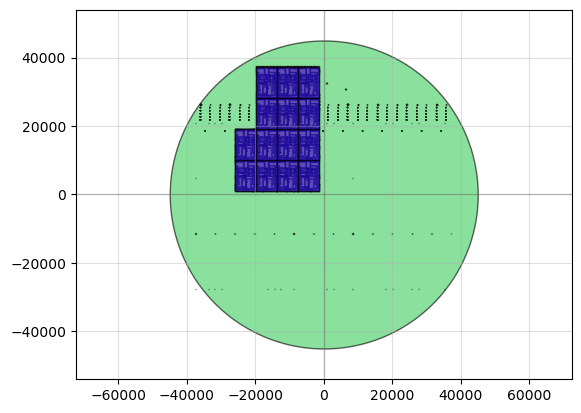

'Yuvi_wafer_optical.gds'

In [471]:
num_copies = 3
y_pitch = 9000 + 100
x_pitch = 6000 + 100
start_loc = (-38000 + x_pitch*3, 1000 + y_pitch*2)
place_chip_row(
    wafer=wafer,
    gds_files=[kaveh_files[1] for _ in range(num_copies)],
    start_position=start_loc,
    chip_size=(6000, 9000),
    spacing=100,
    layers=(200, 5)
)
place_chip_row(
    wafer=wafer,
    gds_files=[kaveh_files[0] for _ in range(num_copies)],
    start_position=(start_loc[0], start_loc[1] + (9000 + 100)* 1) ,
    chip_size=(6000, 9000),
    spacing=100,
    layers=(200, 5)
)
qp(wafer)
wafer.write_gds("Yuvi_wafer_optical.gds")

In [472]:
folder_lab_designs = "lab_designs/"
mihir_files = [
    folder_lab_designs + "center_feedline_resonator_final_vortex_11182025_single_layer.gds",
    # folder_lab_designs + "SiQbv2_wide_JJ_EEEEEEESH_jc0.3_offset0.0.gds", # buffer 
    folder_lab_designs + "20251029_Mihir_HallBars_Metals-Superconductors_v5_layer5.gds",
    # folder_lab_designs + "center_feedline_resonator_final_vortex_11182025_single_layer.gds"
]
mihir_layers = [[5,5], [5,5]]

In [473]:
import phidl

# 1. Specify the path to your GDS file
gds_file = mihir_files[1] # Or 'my_layout.oas' for OASIS files

try:
    # 2. Read the GDS file into a PHIDL Device object
    # The 'cellname' argument can be used if you know the top-level cell name.
    # If not specified, PHIDL will try to automatically find the top-level cell(s).
    D = pg.import_gds(gds_file)

    # 3. Use the get_layers() method to find all layers in the Device hierarchy
    used_layers = D.get_layers()

    # 4. Print the results
    print(f"Layers found in the file '{gds_file}':")

    # A set is unordered, so converting to a sorted list is nice for printing
    sorted_layers = sorted(list(used_layers))
    print(sorted_layers)

except FileNotFoundError:
    print(f"Error: The file '{gds_file}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Layers found in the file 'lab_designs/20251029_Mihir_HallBars_Metals-Superconductors_v5_layer5.gds':
[np.int64(1), np.int64(5)]


In [474]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [475]:
# x and y offset are lower left corner of first row qubit
x_offset =-40370
y_offset = 500
pitch = 7000 + 100

# typically chip dxfs have origin at center of chip. for these ones, origin is at lower left corner
if show_layers_dict['optical']:
  place_chip_row(wafer = wafer, 
                gds_files = mihir_files,
                start_position = (x_offset, y_offset),
                chip_size = (7000, 7000),
                spacing = 100,
                layers = mihir_layers,
                  origin_at_chip_botleft_corner = False
                ) 
  place_chip_row(wafer = wafer, 
                gds_files = mihir_files,
                start_position = (x_offset, y_offset + pitch),
                chip_size = (7000, 7000),
                spacing = 100,
                layers = mihir_layers,
                  origin_at_chip_botleft_corner = False
                ) 
else: 
  pass
  # ebeam layer
  # undercut 
  # full cut 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


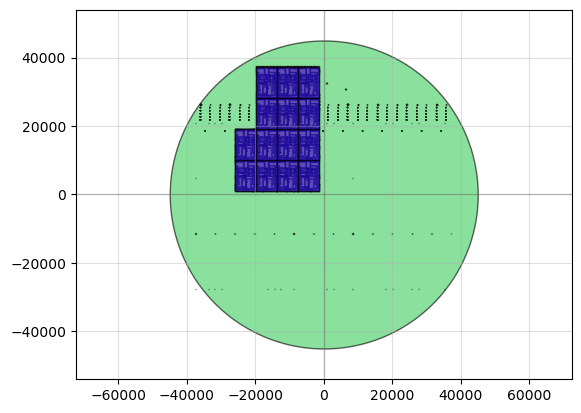

In [476]:
qp(wafer)

# FInal

In [477]:
# wafer = pg.union(wafer, by_layer=True, layer=5) # resolves any dicing lane overlaps with itself

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


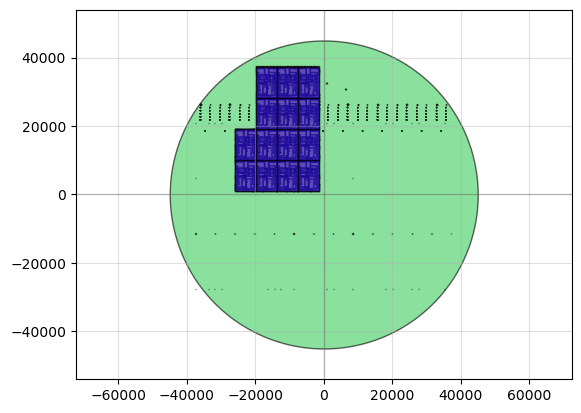

In [478]:
qp(wafer)

In [479]:
# Save the wafer layout to a GDS file
wafer.write_gds("Yuvi_wafer_optical.gds")

'Yuvi_wafer_optical.gds'